## Clustering Music Genres

Cluster analysis of music genres provides a better understanding of music data and improves user experience. This process forms the basis of music recommendation systems and enriches listeners' music discovery.

**Information About Columns**
* Index: A unique identifier for each piece of music in the dataset. Often used for sorting or referencing.

* Title: The name of the piece of music. This is the basic information that allows the piece to be recognized.

* Artist: The name of the artist who performed the piece of music. There can be more than one artist or group.

* Top Genre: The main genre of music that the piece of music belongs to. For example, it is divided into categories such as pop, rock, hip-hop.

* Year: Indicates the year the piece was released. This is important for analyzing changing music trends over time.

* Beats Per Minute (BPM): A value that measures the tempo of the piece of music. A higher BPM means a faster tempo for the piece.

* Energy: A measure that indicates the energetic level of the piece. It takes a value between 0 and 1; higher values indicate a higher energy level.

* Danceability: Indicates the danceability level of the piece. This property is calculated based on elements such as rhythm and tempo. Higher values indicate that the piece is suitable for dancing.

* Loudness (dB): A value that measures the loudness of a track. It is expressed in decibels (dB); higher values indicate tracks that are played louder.

* Liveness: Measures the liveliness of a track. Higher values ​​indicate that the track was played live or recorded.

* Valence: A value that measures the positive emotional content of a track. It takes a value between 0 and 1; higher values generally indicate happy and positive tracks.

* Length (Duration): Indicates the length of a musical track. Usually expressed in seconds or minutes.

* Acousticness: Indicates the acoustic properties of a track. Higher values ​​indicate tracks with more natural instrumentation and acoustic elements.

* Speechiness: Indicates how much spoken content is in the track. Higher values ​​indicate tracks with more spoken content.

* Popularity: A value that measures the popularity of a track. It provides information about how much interest users have; usually related to the number of streams or user interactions.

<img src='msc.jpg' width=450 >

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
df=pd.read_csv('Spotify-2000.csv')
#Read the file.

## EDA- Exploratory Data Analysis

In [ ]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [ ]:
df.shape

(1994, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


In [ ]:
df.isnull().sum()

,0
Index,0
Title,0
Artist,0
Top Genre,0
Year,0
Beats Per Minute (BPM),0
Energy,0
Danceability,0
Loudness (dB),0
Liveness,0


## Data Visualization

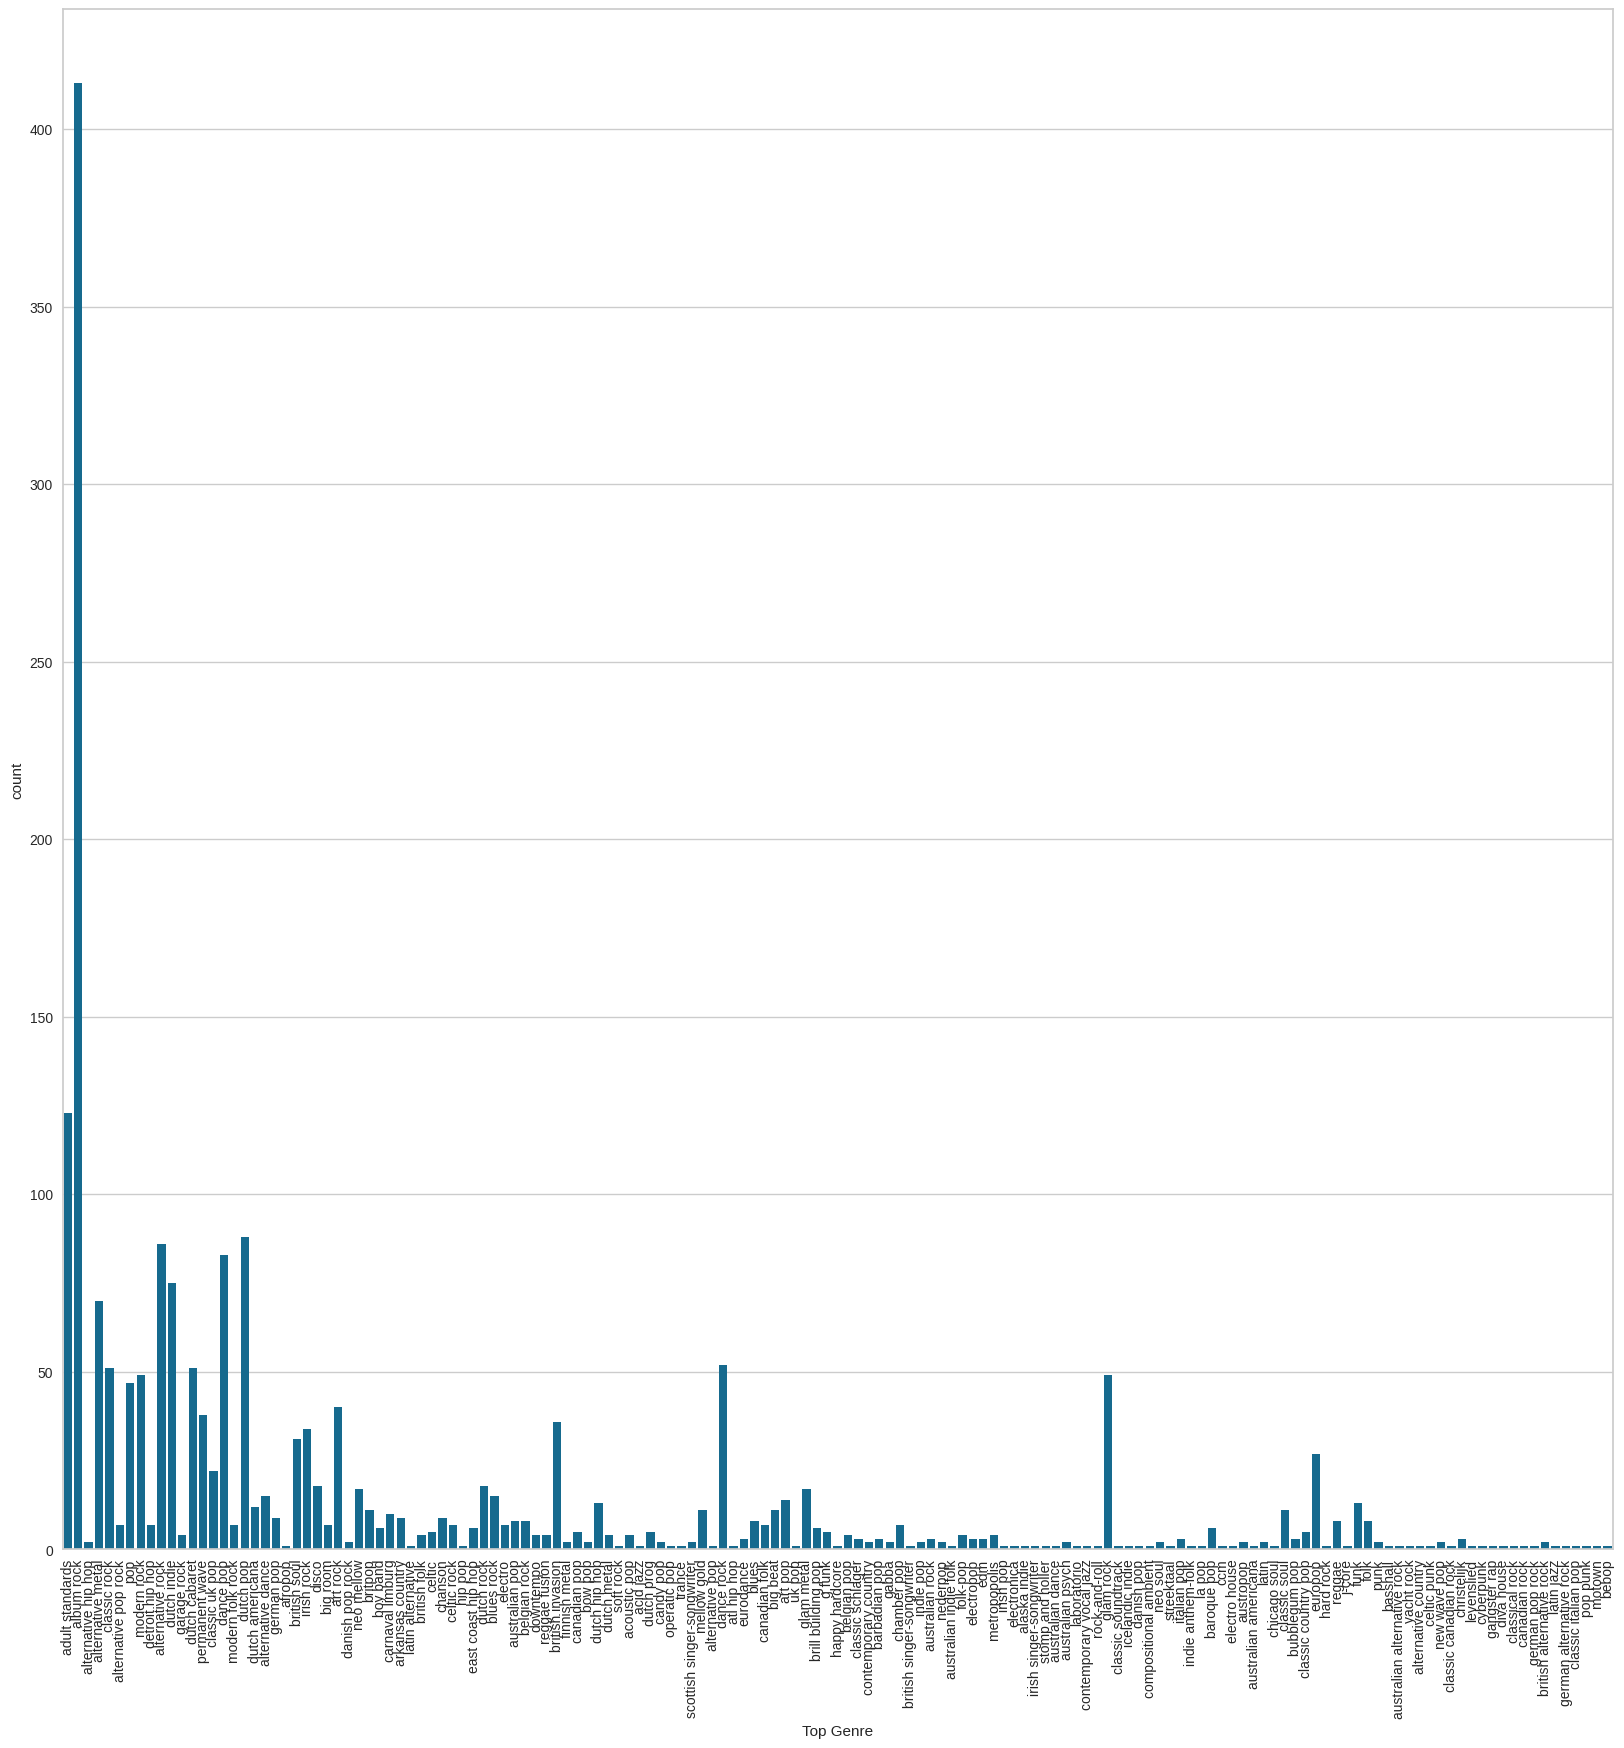

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x=df['Top Genre'])
plt.xticks(rotation=90);

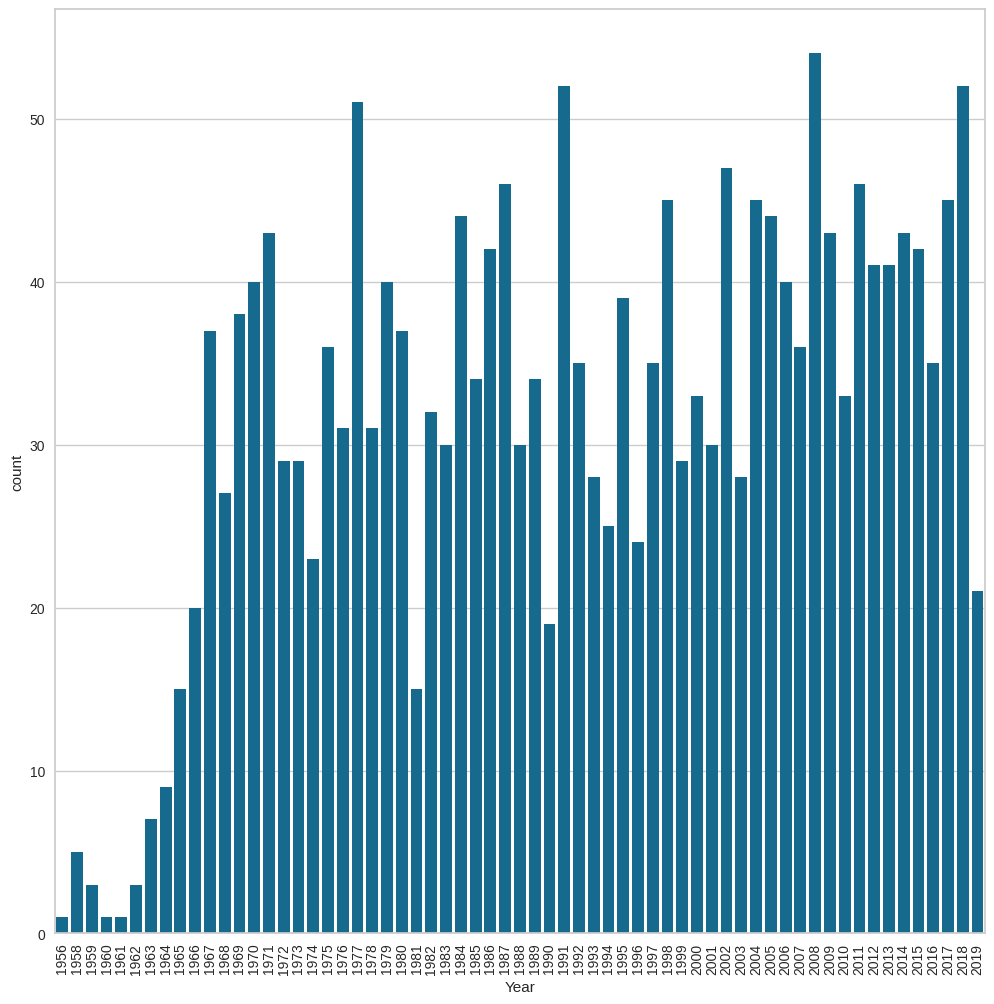

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=df['Year'])
plt.xticks(rotation=90);

## Modelling

In [ ]:
x=df[["Beats Per Minute (BPM)", "Loudness (dB)",
              "Liveness", "Valence", "Acousticness",
              "Speechiness"]]

In [ ]:
model=KMeans(4)

In [ ]:
model=model.fit(x)

In [ ]:
tahmin=model.predict(x)

In [ ]:
x['cluster']=tahmin

In [ ]:
silhouette_score(x, tahmin)

0.2568701167861267

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x, tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.29849507415972254
0.25912720537029693
0.2568701167861267
0.2501501172982032
0.2572250085374251
0.26875507295500595
0.26606602687201947
0.25794853799757517


### YellowBrick

In [ ]:
#pip install yellowbrick

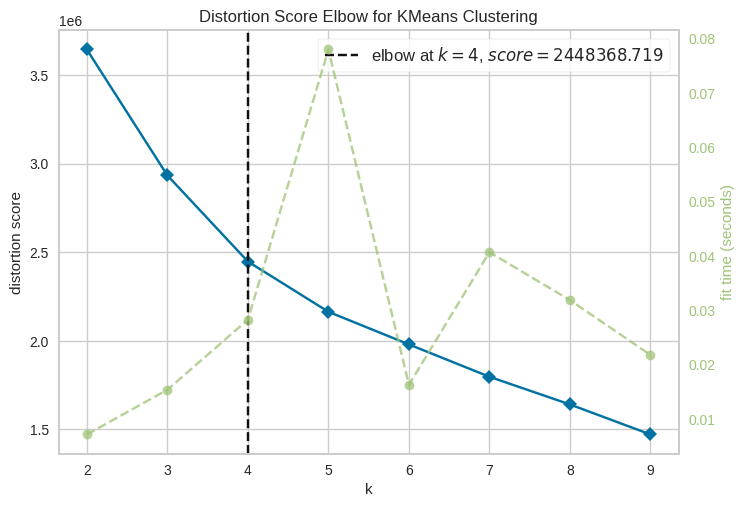

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
km=KMeans()
a=KElbowVisualizer(km,k=(2,10))
a.fit(x)
a.show()

In [ ]:
data=linkage(x, method='ward', metric='euclidean')

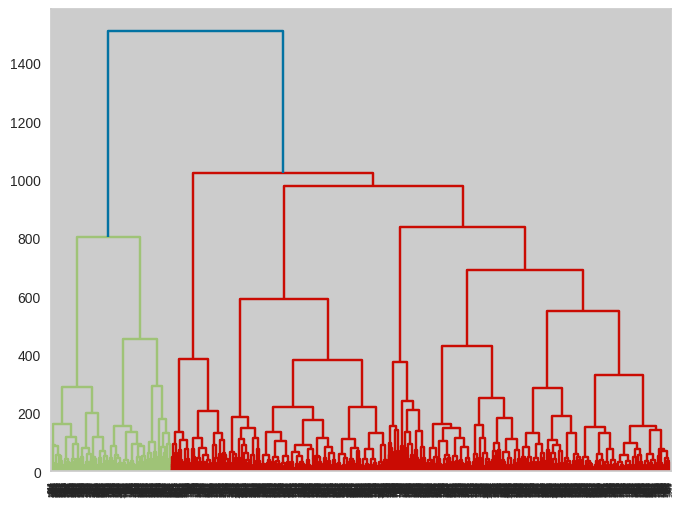

In [ ]:
plt.figure(figsize=(8,6))
dendrogram(data);

In [ ]:
x['cluster']

,cluster
0,3
1,1
2,2
3,2
4,1
...,...
1989,3
1990,2
1991,2
1992,2


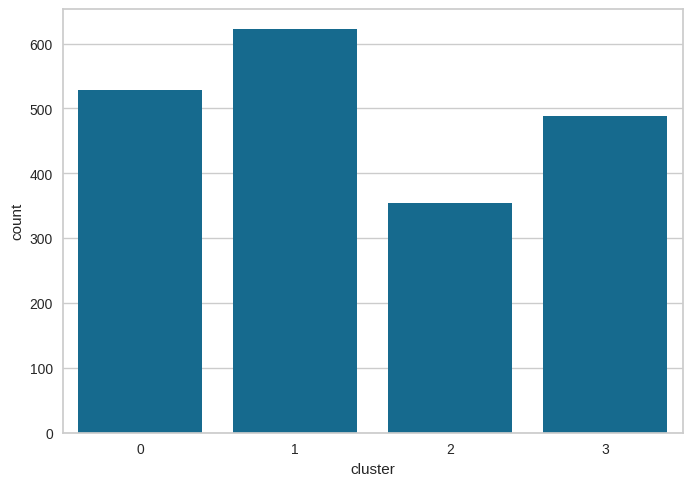

In [ ]:
sns.countplot(x=x['cluster']);

### Normalization

In [23]:
from sklearn.preprocessing import normalize, scale

In [24]:
df['Length (Duration)'] = df['Length (Duration)'].str.replace(',', '', regex=False)

df['Length (Duration)']=df['Length (Duration)'].astype('float')

In [25]:
x=df[['Beats Per Minute (BPM)','Energy','Danceability','Loudness (dB)','Liveness','Valence',
      'Length (Duration)','Acousticness','Speechiness','Popularity']]

In [26]:
normalizeddata=normalize(x)

In [27]:
n_df=pd.DataFrame(normalizeddata)

In [28]:
n_df.columns=['Beats Per Minute (BPM)','Energy','Danceability','Loudness (dB)','Liveness','Valence','Length (Duration)','Acousticness','Speechiness','Popularity']

In [29]:
n_df.head()

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,0.530496,0.101369,0.179085,-0.047305,0.037169,0.229769,0.679170,0.317622,0.010137,0.239906
1,0.481391,0.281703,0.178293,-0.039224,0.060620,0.288835,0.738133,0.060620,0.024961,0.139069
2,0.418032,0.171692,0.164227,-0.022395,0.017418,0.129391,0.848506,0.004977,0.042301,0.171692
3,0.498286,0.276506,0.123851,-0.011521,0.008641,0.106570,0.774792,0.000000,0.011521,0.218900
4,0.338527,0.261879,0.185232,-0.015968,0.031936,0.277848,0.817574,0.003194,0.009581,0.188425


In [30]:
x=n_df

In [31]:
model=KMeans(4)

In [32]:
model=model.fit(x)

In [33]:
tahmin=model.predict(x)

In [34]:
x['s_cluster']=tahmin

In [35]:
silhouette_score(x, tahmin)

0.7893876878018683

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x, tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.6820270175431332
0.6766171015510695
0.7893876878018683
0.6621962007541978
0.4797709793795207
0.34534538533647635
0.3674036374930698
0.2441687776368226


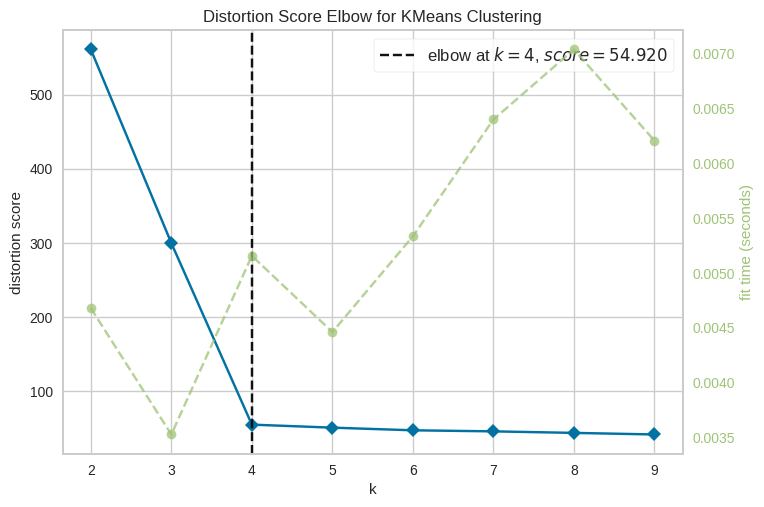

In [37]:
km=KMeans()
a=KElbowVisualizer(km,k=(2,10))
a.fit(x)
a.show();

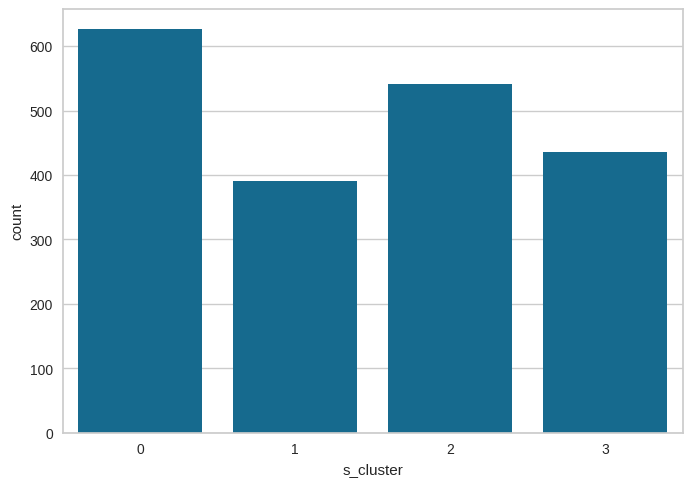

In [38]:
sns.countplot(x=x['s_cluster']);

In [39]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201.0,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207.0,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341.0,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269.0,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256.0,1,3,59


In [45]:
df['Cluster'] = x['s_cluster']

In [50]:
df[df.Cluster==1]['Top Genre']

,Top Genre
0,adult standards
10,adult standards
15,dutch cabaret
25,dutch americana
28,german pop
...,...
1978,adult standards
1987,adult standards
1988,adult standards
1989,adult standards


In [51]:
df[df.Cluster==2]['Top Genre']

,Top Genre
1,album rock
4,classic rock
6,pop
9,detroit hip hop
12,dutch indie
...,...
1985,adult standards
1986,adult standards
1990,adult standards
1991,blues rock


In [56]:
df[df.Cluster==3]['Year']

,Year
2,2001
3,2007
8,2004
11,2003
16,2005
...,...
1960,1969
1969,1969
1971,1969
1977,1969


### AutoML with PyCaret

In [ ]:
#pip install pycaret

In [ ]:
from pycaret.clustering import*

In [ ]:
setup(df)

,Description,Value
0,Session id,8571
1,Original data shape,"(1994, 11)"
2,Transformed data shape,"(1994, 11)"
3,Numeric features,11
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
kmeans=create_model('kmeans',4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7930,33933.4671,0.3047,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plot_model(kmeans)

In [ ]:
plot_model(kmeans, plot='tsne')

### Summary

In this project, clustering music genres is the task of grouping music according to similarities in their sound features. First, the features of the music data were determined (e.g. tempo, energy, danceability, etc.). The variable x was defined as a data frame containing music features. The first model was trained on the determined features. When the performance of the model was evaluated, a low Silhouette Score was obtained. This indicates that the clusters were not sufficiently separated from each other and the types (scales) of the features were different. As a result of the low performance, we decided to normalize the data. This process allows the features at different scales to be brought to the same scale. After normalization, the model was trained again. After normalization, the performance of the model increased and a better Silhouette Score was obtained. This indicates that the clusters became more distinct and were better grouped. We visualized the breakpoint and the number of clusters. Then we used the pycaret package. After a few graphs, we successfully completed our project.